In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(13)

### Данные

In [2]:
data = load_digits()

In [3]:
X = data['data']
y = (data['target'] >= 5).astype(np.int32)

<Figure size 640x480 with 0 Axes>

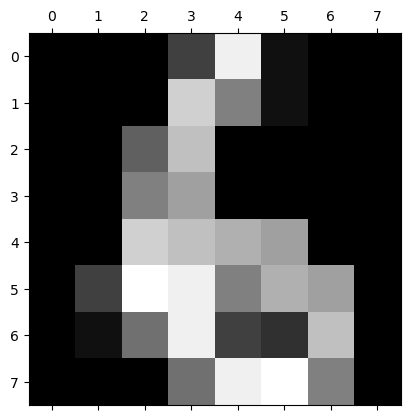

6


In [4]:
plt.gray()
index = np.random.randint(0, len(X) - 1)
plt.matshow(X[index].reshape(8, 8))
plt.show()
print(data.target[index])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.77,
                                                    shuffle=True)

In [6]:
X_train.shape, X_test.shape

((1383, 64), (414, 64))

### Логистическая регрессия

Вычисление предсказания логистической регрессией для объекта $x_i \in \mathbb{R}^n$ :

* $z = w^T x_i + b, \quad w \in \mathbb{R}^n, b \in \mathbb{R}$
* $a = \sigma (z)$

Сигмоида

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

![alt text](https://upload.wikimedia.org/wikipedia/commons/a/ac/Logistic-curve.png)

Логистическая фунция потерь:

$$L_i(a) = -y_i \cdot log(a) - (1 - y_i) \cdot log(1 - a)$$

Производные функции по параметрам:

$$\frac{\partial L_i}{\partial w} = \frac{\partial L_i}{\partial a} \cdot \frac{\partial a}{\partial z}
\cdot \frac{\partial z}{\partial w} = \frac {a - y_i} {a \cdot (1-a)} \cdot a \cdot (1-a) \cdot x_i = (a-y_i) \cdot x_i $$

$$\frac{\partial L_i}{\partial b} = \frac{\partial L_i}{\partial a} \cdot \frac{\partial a}{\partial z}
\cdot \frac{\partial z}{\partial b} = \frac {a - y_i} {a \cdot (1-a)} \cdot a \cdot (1-a) \cdot 1 = a-y_i $$

Используются для минимизации функции потерь $L$ с помощью градиентного спуска.

In [7]:
def log_loss(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred), axis=0) / len(y_true)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
m, n = X_train.shape
print(f'Число объектов в обучающей выборке: {m}\nРазмерность объекта: {n}')

Число объектов в обучающей выборке: 1383
Размерность объекта: 64


### Задание: Реализовать алгоритм градиентного спуска для поиска весов логистической регрессии. Посчитать значение метрики accuracy для полученного прогноза на тестовых данных.

In [9]:
def sigmoid(z): # сигмоида
    return 1 / (1 + np.exp(-z))

def gradient_descent(X, y, learning_rate, num_iterations): # градиентный спуск
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0

    for i in range(num_iterations):
        z = np.dot(X, weights) + bias
        predictions = sigmoid(z)
        errors = predictions - y
        gradient_weights = np.dot(X.T, errors) / m
        gradient_bias = np.sum(errors) / m
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias

        #можно узнать потери на каждой итерации (убрать #)
        
        #if i % 100 == 0:
            #loss = log_loss(y, predictions)
            #print(f'Итерация {i}: потеря {loss}')

    return weights, bias

# Функция для вычисления логарифмической функции потерь
def log_loss(y_true, y_pred):
    epsilon = 1e-15  # Маленькое значение для предотвращения логарифма от нуля
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Ограничиваем значения y_pred
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [11]:
#исходные данные
X = data['data']
y = (data['target'] >= 5).astype(np.int32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
weights, bias = gradient_descent(X_train, y_train, learning_rate=0.01, num_iterations=1000)
z_test = np.dot(X_test, weights) + bias
preds_prob = sigmoid(z_test)
preds = (preds_prob >= 0.5).astype(int)
accuracy = accuracy_score(y_test, preds)
print("Accuracy:", accuracy)

Accuracy: 0.8944444444444445
